In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import researchpy as rp
import numpy as np
from scipy import stats

%matplotlib inline

In [2]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


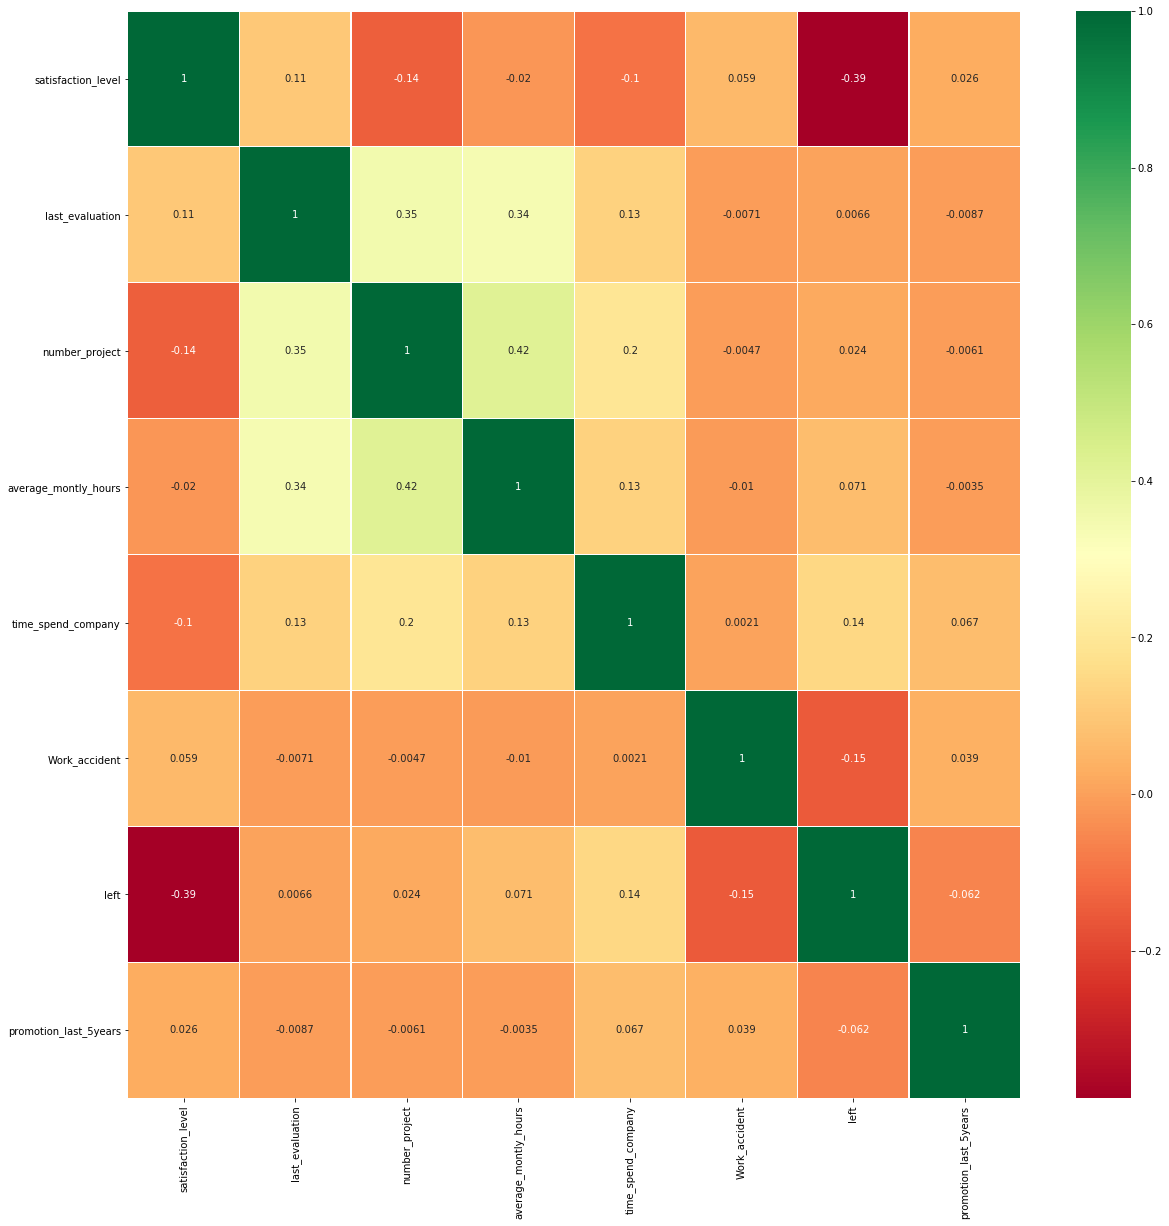

In [8]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

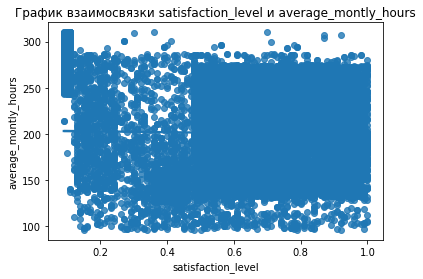

In [16]:
sns.regplot(x=  data['satisfaction_level'], y= data['average_montly_hours'],data=data, fit_reg=True)
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.title('График взаимосвязки satisfaction_level и average_montly_hours')
plt.show()

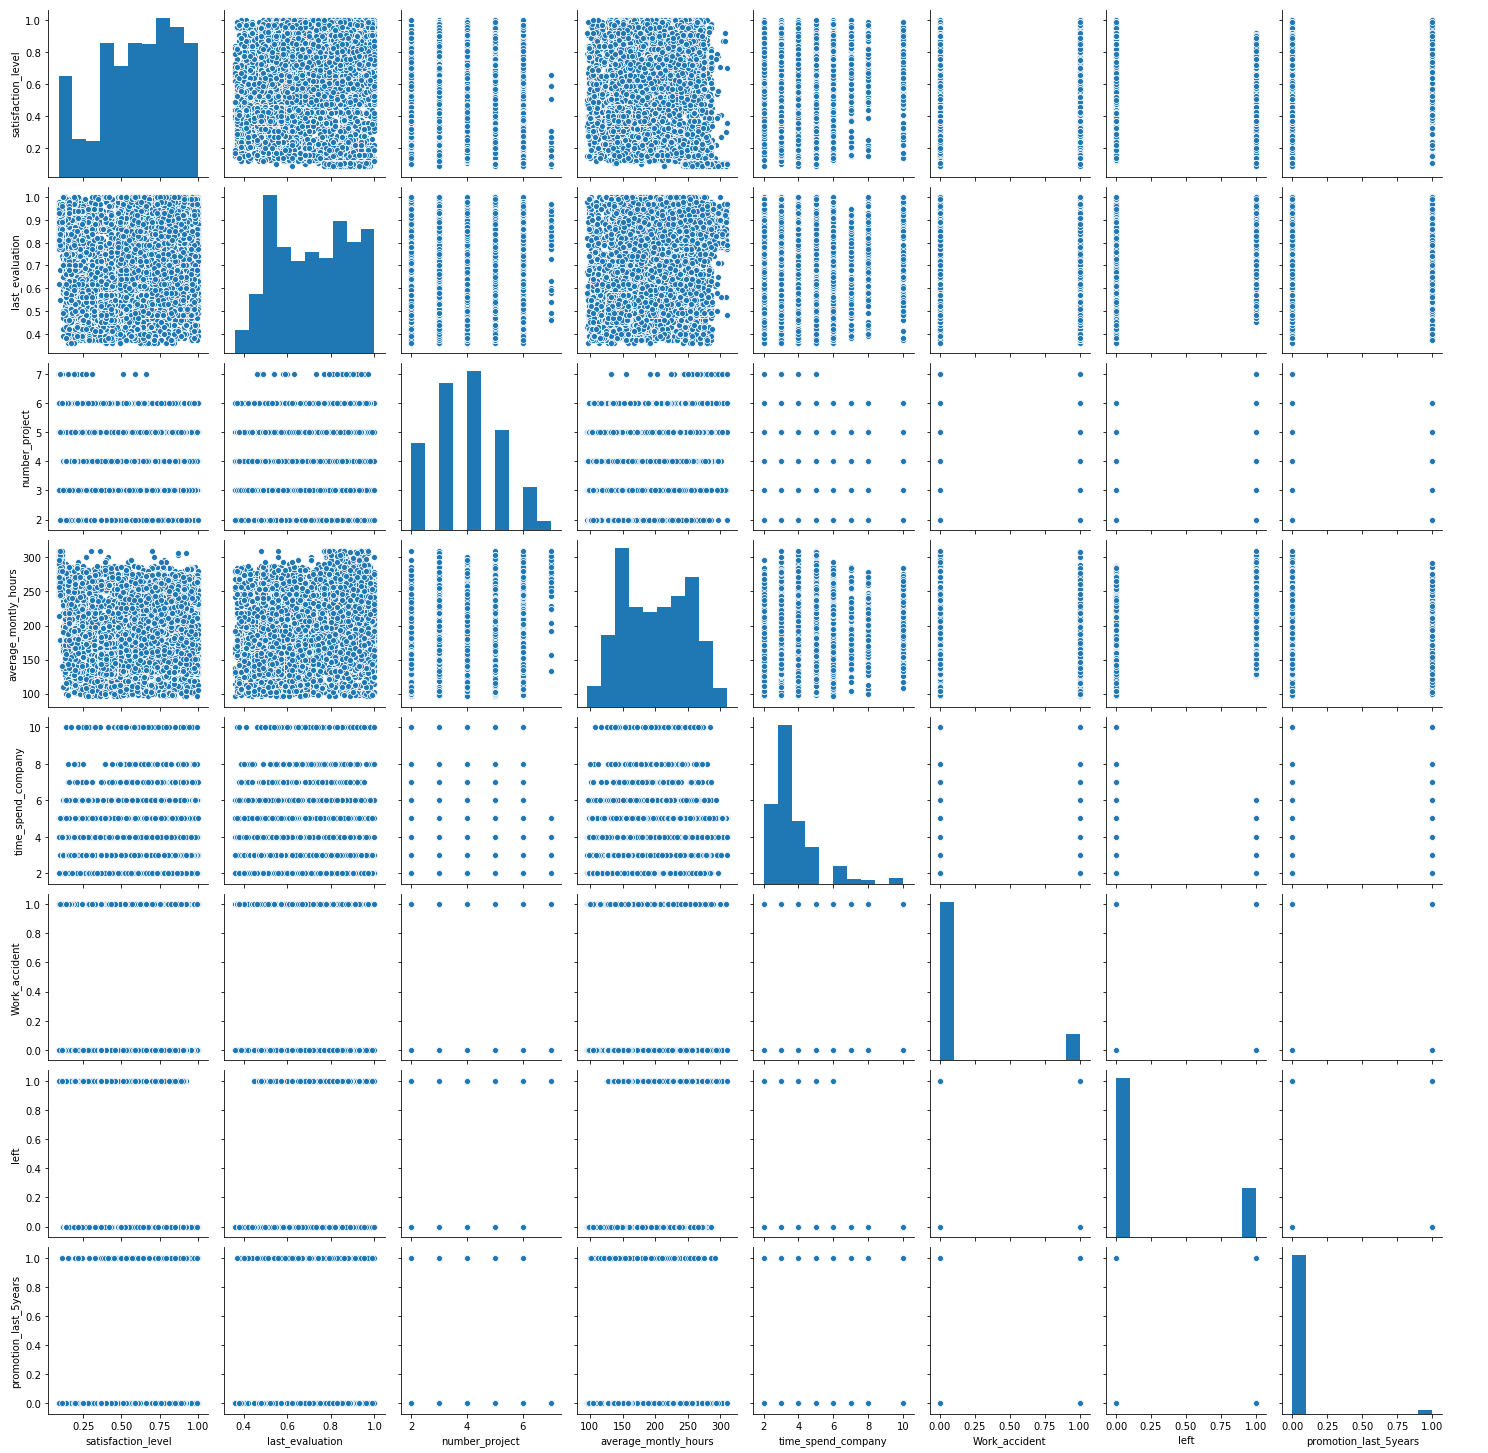

In [18]:
g = sns.pairplot(data)

In [21]:
s, p = stats.ttest_ind(data['number_project'],data['average_montly_hours'])
print(s, p)

-483.54229603425085 0.0


In [22]:
descriptives, results = rp.ttest(data['left'], data['satisfaction_level'])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,left,14999.0,0.238083,0.425924,0.003478,0.231266,0.244899
1,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
2,combined,29998.0,0.425458,0.395880,0.002286,0.420978,0.429938


In [23]:
 results

,Independent t-test,results
0,Difference (left - satisfaction_level) =,-0.3748
1,Degrees of freedom =,29996.0000
2,t =,-93.0608
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-1.0746
7,Hedge's g =,-1.0746
8,Glass's delta =,-0.8799
9,r =,0.4733


Распределение сотрудников по департаментам:

In [25]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Распределение сотрудников по уровню зарплаты:

In [27]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Распределение сотрудников по департаменту и уровню зарплаты:

In [32]:
pd.crosstab(data['sales'], data['salary'])

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [35]:
print(f"Компанию покинули {sum(data['left'])} сотрудников")

Компанию покинули 3571 сотрудников


Построим модель Random Forest, чтобы посмотреть какие переменные больше всего влияют на целевую переменную left

In [37]:
x, y = data.drop(['sales', 'left'], axis=1), data.left

Наминативную переменную salary представим в числовом виде:

In [38]:
X = pd.get_dummies(x)

In [39]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,1,0


Нормализуем данные:

In [41]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(np_scaled)
X_norm.columns = X.columns
X_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,1.0,0.0


Разобьем выборку на обучающую и тестовую:

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_norm,y, test_size = 0.3, random_state = 42)

In [43]:
# выбираем 100 деревьев в качестве параметра
model_rf=RandomForestClassifier(n_estimators=100)
# обучаем модель
model_rf.fit(x_train,y_train)

RandomForestClassifier()

Качество модели:

In [44]:
print(classification_report(y_test, model_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



Наиболее значимые атрибуты

No handles with labels found to put in legend.


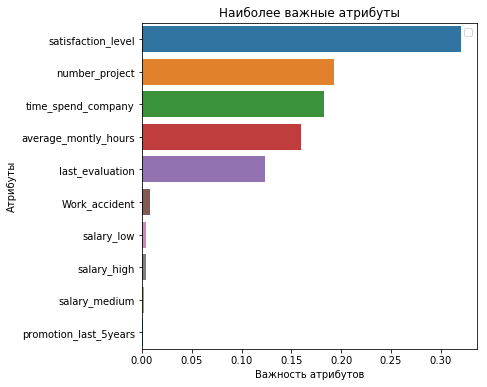

In [46]:
headers = list(X_norm.columns)

feature_imp = pd.Series(model_rf.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Проверим гипотезу о том, что наиболее значимая переменная - уровень удовлетворенности сотрудников (satisfaction_level) - влияет на вероятность ухода:

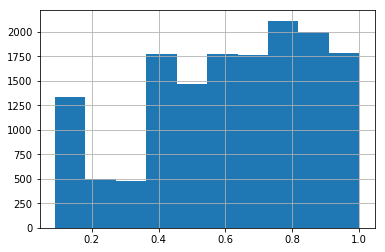

In [49]:
data['satisfaction_level'].hist()

Разделим на 2 группы по уровню satisfaction_level:

In [50]:
happy = data[data['satisfaction_level']<=0.6].left
sad = data[data['satisfaction_level']>0.6].left

In [51]:
happy.shape, sad.shape

((6729,), (8270,))

In [52]:
s, p = stats.ttest_ind(happy,sad)

In [54]:
print(s,p)

40.51506149198695 0.0


In [55]:
descriptives, results = rp.ttest(data['left'], data['satisfaction_level'])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,left,14999.0,0.238083,0.425924,0.003478,0.231266,0.244899
1,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
2,combined,29998.0,0.425458,0.395880,0.002286,0.420978,0.429938


In [56]:
results

,Independent t-test,results
0,Difference (left - satisfaction_level) =,-0.3748
1,Degrees of freedom =,29996.0000
2,t =,-93.0608
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-1.0746
7,Hedge's g =,-1.0746
8,Glass's delta =,-0.8799
9,r =,0.4733


p-уровень значимости меньше 0.05, значит можно отвергнуть нулевую гипотезу об отсутствии различий в сравнимаемых группах satisfaction_level по показателю left. Это говорит о том, что между группами есть статистически значимое различие.

Кажется странным, что уровень зарплаты слабо влияем на вероятность ухода. Возможно, это издержки выбранного метода анализа. 
Посмотрим на расперделение целевой переменной left в зависимости от уровня зарплаты salary

In [63]:
data[['left', 'salary']].groupby(['salary']).agg('sum')

,left
salary,
high,82
low,2172
medium,1317


In [ ]:
Сделаем тестирование взаимосвязи для трех групп по уровню зарплаты:

In [64]:
high = data[data['salary']=='medium'].left
low = data[data['salary']=='low'].left
medium = data[data['salary']=='medium'].left

In [65]:
stats.f_oneway(high, low, medium)

F_onewayResult(statistic=111.52649041857748, pvalue=6.761763650741118e-49)

p-уровень значимости меньше 0.05, значит можно отвергнуть нулевую гипотезу об отсутствии различий в сравнимаемых группах уровня зарплаты по показателю left. Это говорит о том, что между группами есть статистически значимое различие.